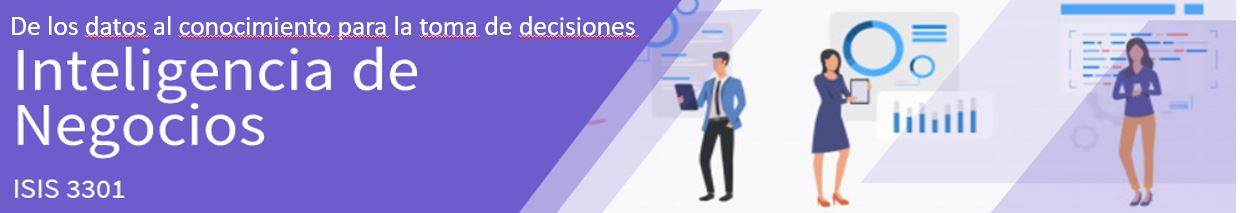

## Caso
BancAlpes es una entidad bancaria que está realizando una campaña de fidelización para aumentar la retención de clientes.
Esta campaña busca ofrecer los mejores productos, servicios y recomendaciones a sus clientes de acuerdo con sus características.
Por esta razón, ha recurrido a ustedes como consultores para que le entreguen al equipo de marketing información que pueda ayudarlos a orientar mejor sus campañas.
En particular, el grupo de marketing espera que le provean grupos a los cuales pueden dirigir sus campañas y las caracteristicas de los clientes en dichos grupos.
BancAlpes considera que esta nueva estrategia de marketing le permitirá aumentar el consumo de productos y servicios y por supuesto, aumentar la retención de clientes.
Los datos proporcionados al equipo contienen el resumen de los clientes del último año, en particular, sus interacciones con la entidad bancaria y el número de tarjetas de crédito.



## 1. Carga de librerías necesarias para implementación

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## 2. Cargar los datos

In [247]:
# Se cargan los datos. 
df_bank=pd.read_csv('202120_Laboratorio_2_datos_BancAlpes_credit_card_data.csv', sep=';', encoding = 'utf-8', index_col=0)

## 3. Perfilamiento y entendimiento de los datos 

In [248]:
df_bank.shape

(660, 10)

In [249]:
df_bank.head()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,,
1,87073,20000,Female,2,Married,24,2,1,1,0
2,38414,120000,Female,2,Single,26,3,0,10,9
3,17341,90000,Female,2,Single,34,7,1,3,4
4,40496,50000,Female,2,Married,37,5,1,1,?
5,47437,50000,Male,2,Married,57,6,0,12,3


In [250]:
# Revisar las características de los datos: completitud y tipo de dato
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             660 non-null    object
 1   Limit_bal            660 non-null    object
 2   Sex                  660 non-null    object
 3   Education            660 non-null    object
 4   Marriage             660 non-null    object
 5   Age                  660 non-null    object
 6   Total_Credit_Cards   660 non-null    object
 7   Total_visits_bank    660 non-null    object
 8   Total_visits_online  660 non-null    object
 9   Total_calls_made     660 non-null    object
dtypes: object(10)
memory usage: 56.7+ KB


In [251]:
# Resumen de los estadisticos de las variables numéricas
df_bank.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660,660,660,660,660,660,660,660,660,660
unique,654,55,10,8,8,48,12,8,17,13
top,-,50000,Female,2,Single,29,4,2,2,4
freq,2,83,372,288,379,37,151,158,189,107


In [252]:
df_testing=df_bank[df_bank['Customer']!='-']
df_testing= df_testing[df_testing['Education'] != 'ABC']
df_testing=df_testing[df_testing['Total_Credit_Cards']!='-']
df_testing=df_testing[df_testing['Total_visits_bank']!='?']
df_testing=df_testing[df_testing['Total_calls_made']!='?']
df_testing=df_testing[df_testing['Marriage']!='?']


In [253]:
# Resumen de los estadisticos de las variables numéricas
df_testing.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,652,652,652,652,652,652,652,652,652,652
unique,647,54,8,6,6,47,11,6,16,11
top,47437,50000,Female,2,Single,27,4,2,2,4
freq,2,80,370,287,377,37,149,158,187,105


In [254]:

df_testing['Customer']=df_testing['Customer'].astype(int)
df_testing['Limit_bal']=df_testing['Limit_bal'].astype(int)
df_testing['Education']=df_testing['Education'].astype(int)
df_testing['Age']=df_testing['Age'].astype(int)
df_testing['Total_Credit_Cards']=df_testing['Total_Credit_Cards'].astype(int)
df_testing['Total_visits_bank']=df_testing['Total_visits_bank'].astype(int)
df_testing['Total_visits_online']=df_testing['Total_visits_online'].astype(int)
df_testing['Total_calls_made']=df_testing['Total_calls_made'].astype(int)

In [255]:
df_testing=df_testing[df_testing['Age']<200]
df_testing=df_testing[df_testing['Total_Credit_Cards']!=123456789]
df_testing['Total_Credit_Cards'].value_counts()

4     148
6     117
7     101
5      73
2      60
1      57
3      51
10     19
9      11
8      11
Name: Total_Credit_Cards, dtype: int64

In [256]:
# Revisar las características de los datos: completitud y tipo de dato
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 1 to 660
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             648 non-null    int32 
 1   Limit_bal            648 non-null    int32 
 2   Sex                  648 non-null    object
 3   Education            648 non-null    int32 
 4   Marriage             648 non-null    object
 5   Age                  648 non-null    int32 
 6   Total_Credit_Cards   648 non-null    int32 
 7   Total_visits_bank    648 non-null    int32 
 8   Total_visits_online  648 non-null    int32 
 9   Total_calls_made     648 non-null    int32 
dtypes: int32(8), object(2)
memory usage: 35.4+ KB


In [257]:
# Transformamos la columna Sex a valores enteros
df_testing['Sex'] = [s.replace("Female", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("Femael", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("f", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("F", "0") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("Male", "1") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("Mael", "1") for s in df_testing['Sex']]
df_testing['Sex'] = [s.replace("M", "1") for s in df_testing['Sex']]

df_testing['Sex'] = df_testing['Sex'].astype(int)


In [258]:
df_testing=df_testing[df_testing['Sex']!=9]
df_testing['Sex'].value_counts()

0    375
1    272
Name: Sex, dtype: int64

In [259]:
df_testing['Marriage'] = [s.replace("Married", "0") for s in df_testing['Marriage']]
df_testing['Marriage'] = [s.replace("Single", "1") for s in df_testing['Marriage']]
df_testing['Marriage'] = [s.replace("Others", "2") for s in df_testing['Marriage']]

df_testing['Marriage'] = df_testing['Marriage'].astype(int)

In [260]:
df_testing['Marriage'].value_counts()

1    378
0    259
2     10
Name: Marriage, dtype: int64

In [261]:
#Normalización
df_testing_pru = df_testing.copy()
df_testing_normalized=(df_testing_pru-df_testing_pru.min())/(df_testing_pru.max()-df_testing_pru.min())

In [262]:
df_testing_normalized.describe()

,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,0.496298,0.258738,0.420402,0.157651,0.307573,0.260347,0.416452,0.486862,0.172798,0.352396
std,0.290313,0.208307,0.494005,0.155794,0.258876,0.172544,0.240158,0.325867,0.197164,0.284626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255696,0.080645,0.000000,0.000000,0.000000,0.129630,0.222222,0.200000,0.066667,0.100000
50%,0.481688,0.209677,0.000000,0.200000,0.500000,0.222222,0.444444,0.400000,0.133333,0.300000
75%,0.747725,0.370968,1.000000,0.200000,0.500000,0.370370,0.555556,0.800000,0.266667,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


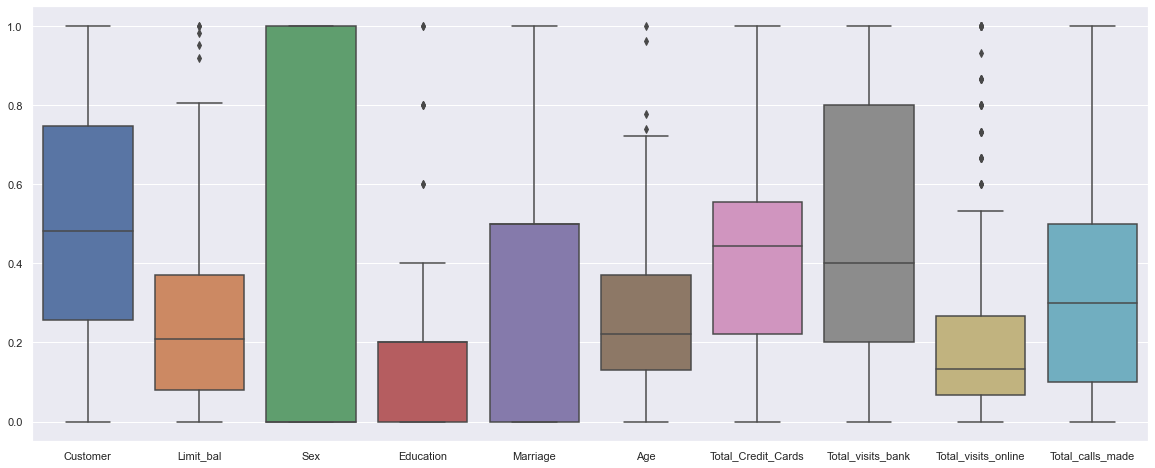

In [263]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_testing_normalized, orient="v")

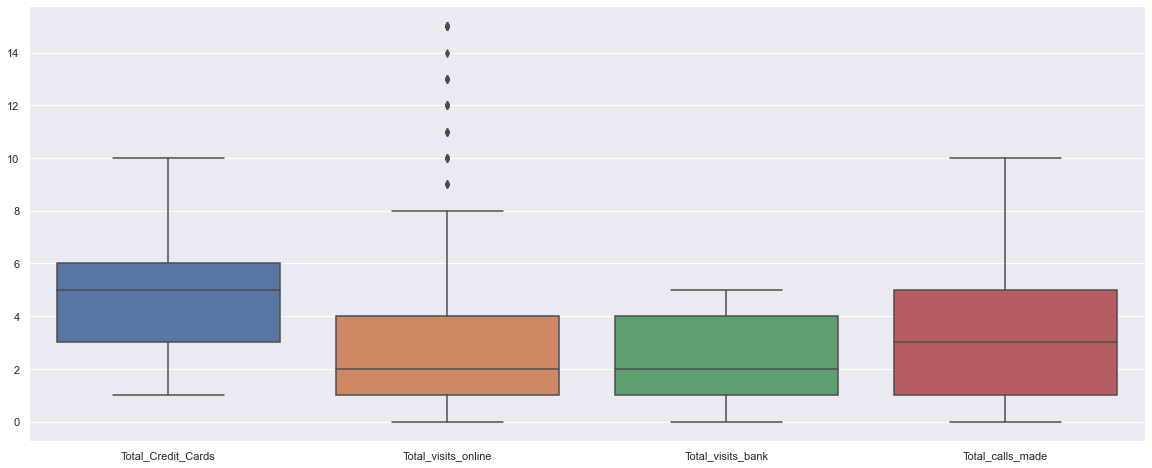

In [264]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_testing[['Total_Credit_Cards','Total_visits_online','Total_visits_bank','Total_calls_made']], orient="v")

**Análisis** 
1. Observamos que artists es una lista al igual que id_artists y que first_artist y second_artist son varibles extraidas de artists.
2. La variable release_date tiene varios formatos 
3. La variable mode según el diccionario tiene el siguiente contenido:"whether the track is major (1) or minor (0)", pero no es así.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

In [265]:
#Consulto una muestra de datos para analizarlos mejor
df_testing_modeling= df_testing_normalized.drop(['Customer'], axis=1)

df_testing_modeling.sample(15)


,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Id,,,,,,,,,
123,0.161290,0.0,0.0,0.0,0.500000,0.111111,0.4,0.133333,0.4
407,0.177419,0.0,0.2,0.0,0.074074,0.555556,0.4,0.000000,0.2
386,0.645161,0.0,0.8,0.0,0.388889,0.666667,0.8,0.133333,0.0
640,0.258065,1.0,0.2,0.5,0.185185,0.666667,0.2,1.000000,0.2
153,0.548387,1.0,0.0,0.5,0.370370,0.222222,0.4,0.133333,0.6
147,0.258065,0.0,0.2,0.5,0.111111,0.111111,0.2,0.200000,0.9
390,0.403226,1.0,0.0,0.0,0.166667,0.333333,1.0,0.000000,0.3
439,0.064516,0.0,0.0,0.0,0.074074,0.666667,0.4,0.066667,0.4
273,0.403226,0.0,0.0,0.5,0.685185,0.555556,0.4,0.133333,0.4


## 4. Iteración 

### 4.1 Identificar las variables a utilizar - les sugerimos dos de las numéricas 

In [266]:
#Escogemos las variables a utilizar
df_model = df_testing_modeling[['Total_Credit_Cards','Total_visits_bank','Total_visits_online']]
df_model.describe()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online
count,647.000000,647.000000,647.000000
mean,0.416452,0.486862,0.172798
std,0.240158,0.325867,0.197164
min,0.000000,0.000000,0.000000
25%,0.222222,0.200000,0.066667
50%,0.444444,0.400000,0.133333
75%,0.555556,0.800000,0.266667
max,1.000000,1.000000,1.000000


### 4.2 Construir el modelo
¿Qué función utilizar para realizar Meanshift y qué parámetros requiere?

In [267]:
#.drop(['Total_Credit_Cards']
X = np.array(df_model).astype(float)


clf = MeanShift()
clf.fit(X)

MeanShift()

In [268]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = df_model.to_numpy()
cols_number

array([[0.11111111, 0.2       , 0.06666667],
       [0.22222222, 0.        , 0.66666667],
       [0.66666667, 0.2       , 0.2       ],
       ...,
       [0.77777778, 0.2       , 0.6       ],
       [1.        , 0.2       , 1.        ],
       [0.88888889, 0.        , 0.8       ]])

In [269]:
#Consultar el los labels del clúster asignado a cada fila 
labels = clf.labels_
# Guardamos las labels originales
labelsO= clf.labels_

labels

array([1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Es dificil de entender el resultado general, por lo que acudimos a la visualización

### 4.3. Visualizar el resultado

C:\Users\Santiago\AppData\Local\Temp/ipykernel_22944/335539233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Cluster'] = labels


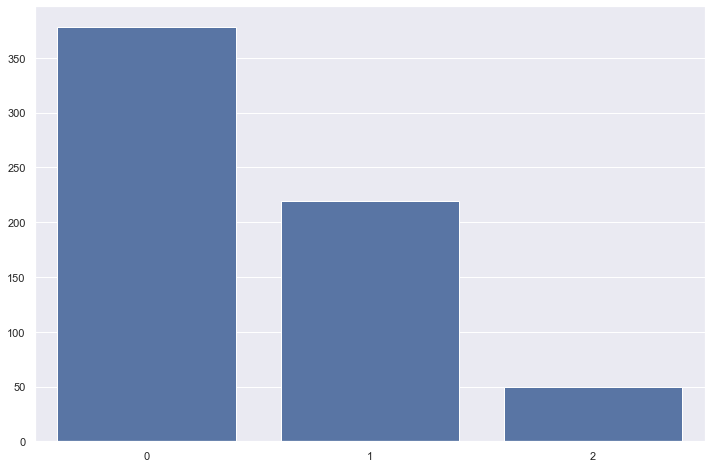

In [270]:
# Revisar la cantidad de registros en los clústeres resultado
df_model['Cluster'] = labels

cluster_distrib = df_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [271]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_model.groupby('Cluster').count()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online
Cluster,,,
0,378,378,378
1,219,219,219
2,50,50,50


In [272]:
clf.cluster_centers_

array([[0.48737374, 0.58441558, 0.07619048],
       [0.1975789 , 0.22568093, 0.20544747],
       [0.86848073, 0.12244898, 0.72653061]])

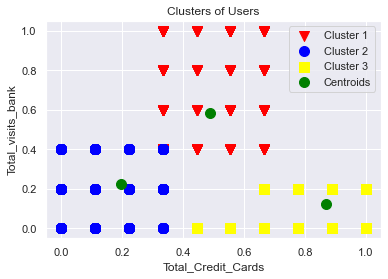

In [273]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[clf.labels_ == 0, 0], cols_number[clf.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[clf.labels_ == 1, 0], cols_number[clf.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[clf.labels_ == 2, 0], cols_number[clf.labels_ == 2, 1], s = 100, marker='s', c = 'yellow', label = 'Cluster 3')

plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Total_visits_bank')
plt.legend()
plt.show()


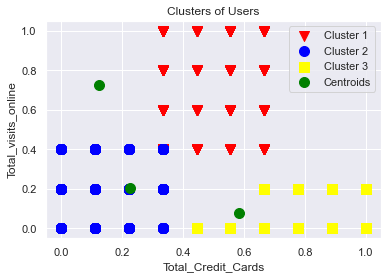

In [274]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[clf.labels_ == 0, 0], cols_number[clf.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[clf.labels_ == 1, 0], cols_number[clf.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[clf.labels_ == 2, 0], cols_number[clf.labels_ == 2, 1], s = 100, marker='s', c = 'yellow', label = 'Cluster 3')

plt.scatter(clf.cluster_centers_[:, 1], clf.cluster_centers_[:, 2], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Total_visits_online')
plt.legend()
plt.show()


## Lidiando con outliers
En este caso, no encontramos datos atípicos claros en nuestros datos, así que se repite de forma regular el proceso de modelación 

In [275]:
df_model_fixed=df_model
df_model_fixed['Cluster'].value_counts()

0    378
1    219
2     50
Name: Cluster, dtype: int64

In [276]:
X = np.array(df_model_fixed).astype(float)
y = np.array(df_model_fixed['Total_Credit_Cards'])

clf = MeanShift()
clf.fit(X)


MeanShift()

In [277]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = df_model_fixed.to_numpy()
cols_number

array([[0.11111111, 0.2       , 0.06666667, 1.        ],
       [0.22222222, 0.        , 0.66666667, 1.        ],
       [0.66666667, 0.2       , 0.2       , 0.        ],
       ...,
       [0.77777778, 0.2       , 0.6       , 2.        ],
       [1.        , 0.2       , 1.        , 2.        ],
       [0.88888889, 0.        , 0.8       , 2.        ]])

In [278]:
#Consultar el los labels del clúster asignado a cada fila 
labels = clf.labels_
labels

array([1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

C:\Users\Santiago\AppData\Local\Temp/ipykernel_22944/3158548119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_fixed['Cluster'] = labels


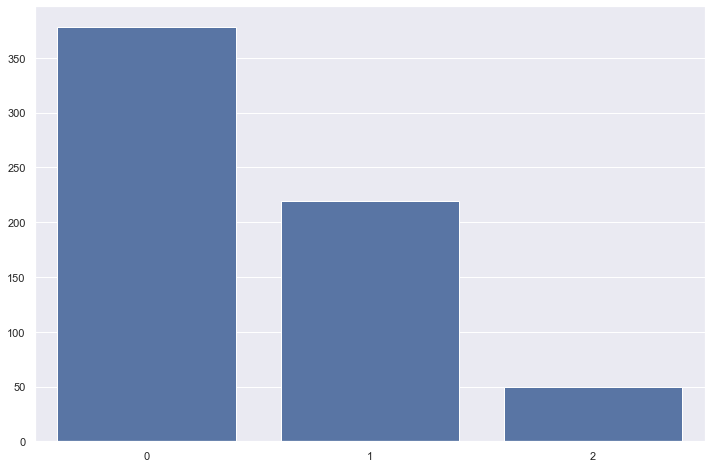

In [279]:
# Revisar la cantidad de registros en los clústeres resultado
df_model_fixed['Cluster'] = labels

cluster_distrib = df_model_fixed['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [280]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_model_fixed.groupby('Cluster').count()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online
Cluster,,,
0,378,378,378
1,219,219,219
2,50,50,50


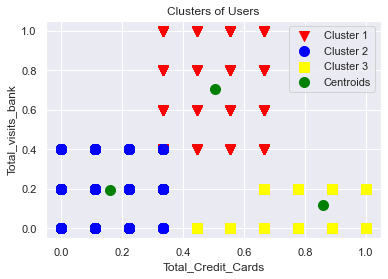

In [281]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[clf.labels_ == 0, 0], cols_number[clf.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[clf.labels_ == 1, 0], cols_number[clf.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[clf.labels_ == 2, 0], cols_number[clf.labels_ == 2, 1], s = 100, marker='s', c = 'yellow', label = 'Cluster 3')

plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Total_visits_bank')
plt.legend()
plt.show()

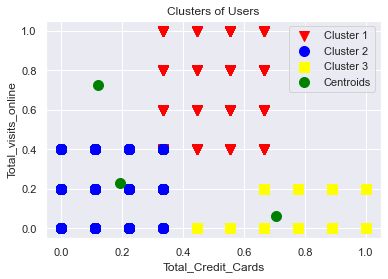

In [282]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[clf.labels_ == 0, 0], cols_number[clf.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[clf.labels_ == 1, 0], cols_number[clf.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[clf.labels_ == 2, 0], cols_number[clf.labels_ == 2, 1], s = 100, marker='s', c = 'yellow', label = 'Cluster 3')

plt.scatter(clf.cluster_centers_[:, 1], clf.cluster_centers_[:, 2], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Total_visits_online')
plt.legend()
plt.show()

C:\Users\Santiago\AppData\Local\Temp/ipykernel_22944/4230931241.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


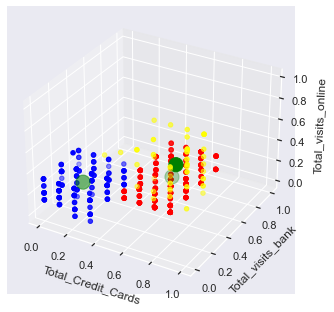

In [283]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[clf.labels_ == 0, 0], cols_number[clf.labels_ == 0, 1], cols_number[clf.labels_ == 0, 2],color='red', label = 'Cluster 1')
ax.scatter(cols_number[clf.labels_ == 1, 0], cols_number[clf.labels_ == 1, 1], cols_number[clf.labels_ == 1, 2],color='blue', label = 'Cluster 2')
ax.scatter(cols_number[clf.labels_ == 2, 0], cols_number[clf.labels_ == 2, 1], cols_number[clf.labels_ == 2, 2],color='yellow', label = 'Cluster 3')


ax.scatter(clf.cluster_centers_[:, 0],clf.cluster_centers_[:, 1], clf.cluster_centers_[:, 2], color='green',marker='o',s=200, label='centroids')
ax.set_xlabel('Total_Credit_Cards')
ax.set_ylabel('Total_visits_bank')
ax.set_zlabel('Total_visits_online')
plt.show()

[0 1 2]


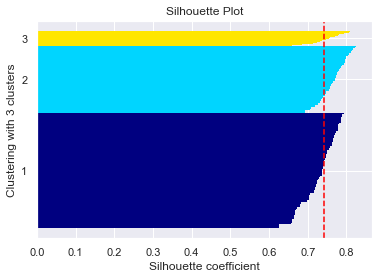

In [284]:
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
plot_silhouette(data = df_model_fixed, 
                labels = clf.labels_, 
                ylabel = 'Clustering with 3 clusters')

## Modificación variable
A Se va a experimentar igualmente con una variable diferente, Total de llamadas, a cambio del numero de visitas online

In [285]:
#Escogemos las variables a utilizar
df_model2 = df_testing_modeling[['Total_Credit_Cards','Total_visits_bank','Total_calls_made']]
df_model2.describe()

,Total_Credit_Cards,Total_visits_bank,Total_calls_made
count,647.000000,647.000000,647.000000
mean,0.416452,0.486862,0.352396
std,0.240158,0.325867,0.284626
min,0.000000,0.000000,0.000000
25%,0.222222,0.200000,0.100000
50%,0.444444,0.400000,0.300000
75%,0.555556,0.800000,0.500000
max,1.000000,1.000000,1.000000


In [286]:
X = np.array(df_model2).astype(float)
y = np.array(df_model2['Total_Credit_Cards'])

clf2 = MeanShift()
clf2.fit(X)

MeanShift()

In [287]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number2 = df_model2.to_numpy()
cols_number2

array([[0.11111111, 0.2       , 0.        ],
       [0.22222222, 0.        , 0.9       ],
       [0.66666667, 0.2       , 0.4       ],
       ...,
       [0.77777778, 0.2       , 0.1       ],
       [1.        , 0.2       , 0.        ],
       [0.88888889, 0.        , 0.2       ]])

In [288]:
#Consultar el los labels del clúster asignado a cada fila 
labels2 = clf2.labels_
labels2

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

C:\Users\Santiago\AppData\Local\Temp/ipykernel_22944/216413623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model2['Cluster'] = labels2


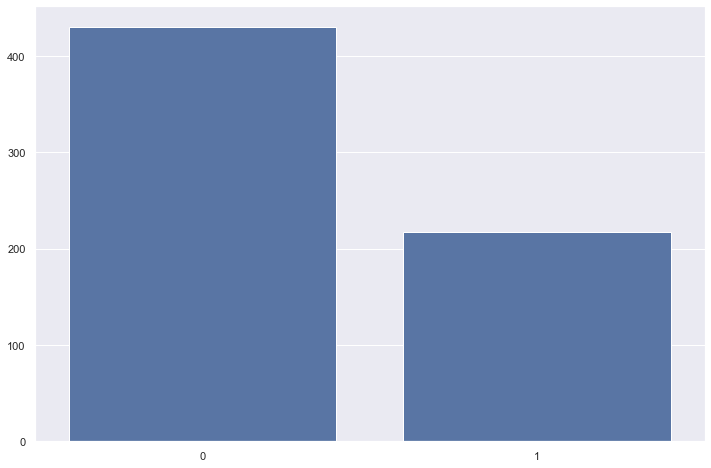

In [289]:
# Revisar la cantidad de registros en los clústeres resultado
df_model2['Cluster'] = labels2

cluster_distrib2 = df_model2['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib2.index, y=cluster_distrib2.values, color='b');

In [290]:
# Eliminamos outliers
df_model_fixed2=df_model2[df_model2['Cluster']!=2]
df_model_fixed2['Cluster'].value_counts()

0    430
1    217
Name: Cluster, dtype: int64

In [291]:
X = np.array(df_model_fixed2).astype(float)


clf2 = MeanShift()
clf2.fit(X)

MeanShift()

In [292]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number2 = df_model_fixed2.to_numpy()
cols_number2

array([[0.11111111, 0.2       , 0.        , 0.        ],
       [0.22222222, 0.        , 0.9       , 1.        ],
       [0.66666667, 0.2       , 0.4       , 0.        ],
       ...,
       [0.77777778, 0.2       , 0.1       , 0.        ],
       [1.        , 0.2       , 0.        , 0.        ],
       [0.88888889, 0.        , 0.2       , 0.        ]])

In [293]:
#Consultar el los labels del clúster asignado a cada fila 
labels2 = clf2.labels_
labels2

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

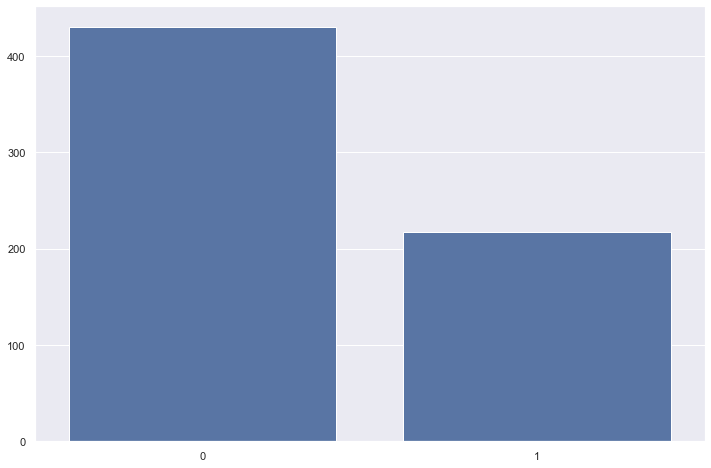

In [294]:
# Revisar la cantidad de registros en los clústeres resultado
df_model_fixed2['Cluster'] = labels2

cluster_distrib2 = df_model_fixed2['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib2.index, y=cluster_distrib2.values, color='b');

In [295]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_model_fixed2.groupby('Cluster').count()

,Total_Credit_Cards,Total_visits_bank,Total_calls_made
Cluster,,,
0,430,430,430
1,217,217,217


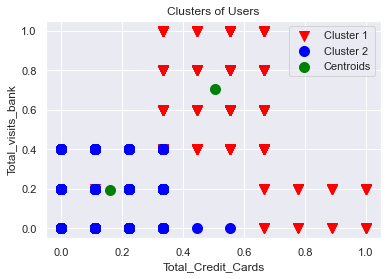

In [296]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number2[clf2.labels_ == 0, 0], cols_number2[clf2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number2[clf2.labels_ == 1, 0], cols_number2[clf2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(clf2.cluster_centers_[:, 0], clf2.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Total_visits_bank')
plt.legend()
plt.show()

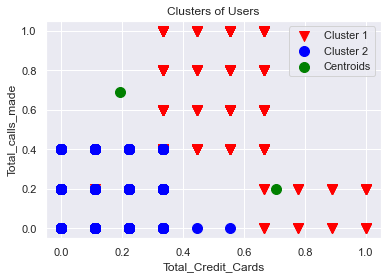

In [297]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number2[clf2.labels_ == 0, 0], cols_number2[clf2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number2[clf2.labels_ == 1, 0], cols_number2[clf2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(clf2.cluster_centers_[:, 1], clf2.cluster_centers_[:, 2], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('Total_Credit_Cards')
plt.ylabel('Total_calls_made')
plt.legend()
plt.show()

[0 1]


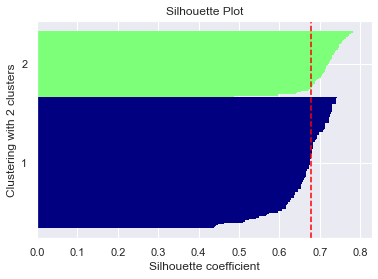

In [298]:

plot_silhouette(data = df_model_fixed2, 
                labels = clf2.labels_, 
                ylabel = 'Clustering with 2 clusters')

## Análisis
Encontramos el puntaje de ambas siluetas, definiendo con esto cuál sería la más acertada

In [299]:
silhouette_avg = silhouette_score(cols_number2, clf2.labels_)
silhouette_avg

0.6779314781994745

In [300]:
silhouette_avg = silhouette_score(cols_number, clf.labels_)
silhouette_avg

0.7420789941222375

Por esto, se escoge el primer cluster generado 
Ahora procedemos a agregar el los labels al dataframe con toda la información original sin normalizar, pero con los datos enteros. Originalmente

In [302]:
#Definimos df_testing con las labels originales. Usamos la original pues incluye los datos atípicos, los cuales estan resentes en el cluster 3
df_testing['Cluster'] = labelsO

df_bank_last= df_testing
df_bank_last.describe()


,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,55226.081917,170417.310665,0.420402,1.788253,0.615147,35.058733,4.748068,2.434312,2.591963,3.523957,0.493045
std,25715.380135,129150.518938,0.494005,0.778972,0.517752,9.317397,2.161418,1.629335,2.957458,2.846262,0.636504
min,11265.000000,10000.000000,0.000000,1.000000,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33914.000000,60000.000000,0.000000,1.000000,0.000000,28.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,53932.000000,140000.000000,0.000000,2.000000,1.000000,33.000000,5.000000,2.000000,2.000000,3.000000,0.000000
75%,77497.000000,240000.000000,1.000000,2.000000,1.000000,41.000000,6.000000,4.000000,4.000000,5.000000,1.000000
max,99843.000000,630000.000000,1.000000,6.000000,2.000000,75.000000,10.000000,5.000000,15.000000,10.000000,2.000000


In [303]:
df_bank_last['Cluster'].value_counts()

0    378
1    219
2     50
Name: Cluster, dtype: int64

In [304]:
df_bank_last.to_csv('bank_post_clustering.csv', sep=';', encoding='utf-8')